In [1]:
import numpy as np
import mlgrad.model as model
import mlgrad.loss as loss
import mlgrad.func as func
import mlgrad.distance as distance
import mlgrad.avragg as avragg
import mlgrad.gd as gd
import mlgrad.regular as regular
import mlgrad.weights as weights
import mlgrad.mlocation_scatter as mlocation_scatter

from mlgrad import averager_it, averager_fg, fg, erm_fg, sg, erm_sg, irgd, erm_irgd, erisk

#import sklearn.linear_model as sklm

import rdata

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['seaborn-notebook', 'seaborn-white', 'seaborn-ticks'])

In [2]:
parsed = rdata.parser.parse_file("data/HRstars.rda")
data = rdata.conversion.convert(parsed)
hr = data['HRstars']
hr[:10]

,ID,V,BV,Para,Uncert
0,2.00,4.61,1.04,0.0135,149
1,3.00,8.45,1.05,0.0717,113
2,4.00,9.01,1.44,0.0886,23
3,6.00,8.60,0.94,0.0147,55
4,7.00,5.96,0.67,0.0455,50
5,7.00,6.43,0.64,0.0455,50
6,8.00,5.70,0.52,0.0495,97
7,8.00,5.69,0.52,0.0495,97
8,9.00,6.13,0.75,0.0664,63
9,9.01,13.74,1.99,0.2130,36


(array([1.603e+03, 1.863e+03, 1.226e+03, 6.810e+02, 3.740e+02, 1.710e+02,
        9.400e+01, 6.000e+01, 3.700e+01, 2.100e+01, 1.600e+01, 1.700e+01,
        9.000e+00, 8.000e+00, 1.000e+01, 3.000e+00, 4.000e+00, 4.000e+00,
        7.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        3.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]),
 array([1.00000e-04, 1.54940e-02, 3.08880e-02, 4.62820e-02, 6.16760e-02,
        7.70700e-02, 9.24640e-02, 1.07858e-01, 1.23252e-01, 1.38646e-01,
        1.54040e-01, 1.69434e-01, 1.84828e-01, 2.00222e-01, 2.15616e-01,
        2.31010e-01, 2.46404e-01, 2.61798e-01, 2.77192e-01, 2.92586e-01,
        3.07980e-01, 3.23374e-01, 3.38768e-01, 3.54162e-01, 3.69556e-01,
        3.8

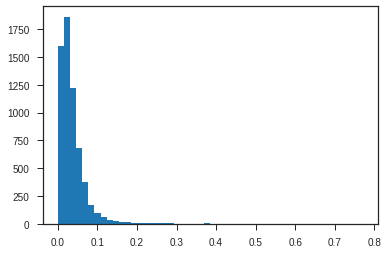

In [3]:
plt.hist(hr['Para'], bins=50)

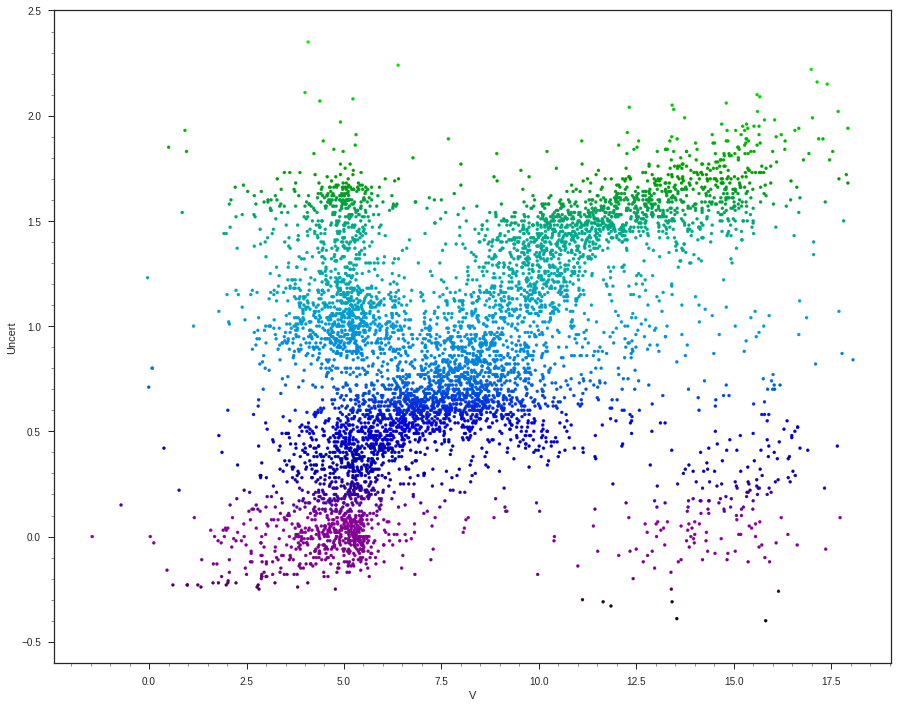

In [29]:
plt.figure(figsize=(15,12))
plt.scatter(hr['V'], hr['BV'], c=hr['BV'], s=9, cmap=plt.cm.nipy_spectral)
plt.xlabel('V')
plt.ylabel('Uncert')
plt.ylim(-0.6,2.5)
plt.minorticks_on()
plt.show()

In [5]:
df = hr
Y = df["V"].values
X = df["BV"].values

Xs = X.reshape((-1,1))

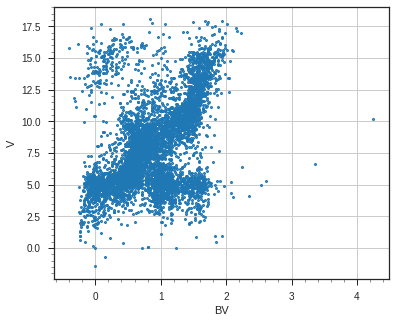

In [6]:
plt.figure(figsize=(6.0, 5.0))
plt.scatter(X, Y, s=1, linewidths=2.)
plt.minorticks_on()
plt.grid(1)
plt.ylabel('V')
plt.xlabel('BV')
plt.show()

In [7]:
loss_func_sq = loss.ErrorLoss(func.Square())
loss_func_abs = loss.ErrorLoss(func.Absolute())

In [8]:
#regular_func = regular.Square()

In [9]:
mod1 = model.LinearModel(1)
mod1.init_param()

Completed? True


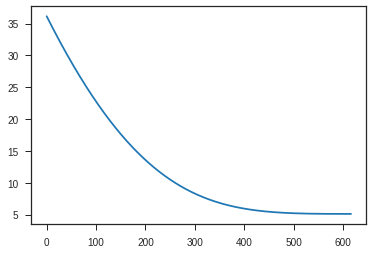

In [10]:
er1 = erisk(Xs, Y, mod1, loss_func_sq)
alg_fg1 = erm_fg(er1, h=0.01, tol=1.0e-6, verbose=0)
print("Completed?", alg_fg1.completed)

plt.plot(alg_fg1.lvals)
plt.show()

In [11]:
mod2 = model.LinearModel(1)
mod2.init_param()

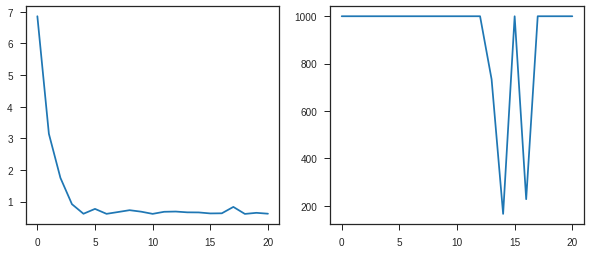

In [12]:
er2 = erisk(Xs, Y, mod2, loss_func_sq)
alg_fg2 = fg(er2, h=0.001, tol=1.0e-6)
avg2 = averager_it(func.QuantileFunc(0.5, func.Sqrt(0.001)))
avg2 = avragg.MWAverage(avg2)
wg2 = weights.MWeights(avg2, er2)
irgd2 = erm_irgd(alg_fg2, wg2, n_iter=21, verbose=0)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(irgd2.lvals)
plt.subplot(1,2,2)
plt.plot(irgd2.n_iters)
plt.show()

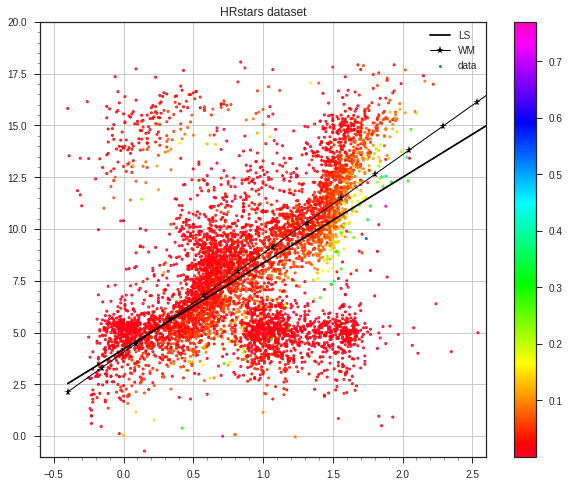

In [13]:
plt.figure(figsize=(10.0, 8.0))
plt.title('HRstars dataset')
sc=plt.scatter(X, Y, s=1, linewidths=2., label='data', c=df['Para'], cmap=plt.cm.gist_rainbow)
plt.colorbar(sc)
X0 = np.linspace(X.min(), X.max(), 20)
plt.plot(X0, mod1.evaluate_all(X0.reshape(-1,1)), c='k', markersize=8, label=r'LS')
plt.plot(X0, mod2.evaluate_all(X0.reshape(-1,1)), color='k', linewidth=1., marker='*', markersize=8, label=r'WM')
plt.minorticks_on()
plt.grid(1)
#plt.xlabel('log.Te')
#plt.ylabel('log.light')
plt.xlim(-0.6, 2.6)
plt.ylim(-1, 20)
plt.legend(loc='best')
plt.show()

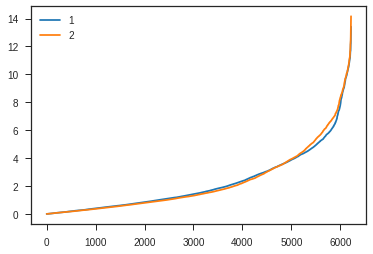

In [14]:
res1 = np.abs(Y - mod1.evaluate_all(Xs))
res1.sort()
res2 = np.abs(Y - mod2.evaluate_all(Xs))
res2.sort()
plt.plot(res1, label='1')
plt.plot(res2, label='2')
plt.legend()
plt.show()

In [15]:
37/47

0.7872340425531915

In [16]:
names = list(hr.keys()[1:])
XX = np.c_[tuple(hr[name].values for name in names[:-1])]

In [17]:
avg3 = averager_it(func.QuantileFunc(0.9, func.Sqrt(0.001)))
avg3 = avragg.MWAverage(avg3)

alg = mlocation_scatter.MLocationScatterEstimator(avg3, n_iter=20)
alg.fit(XX)

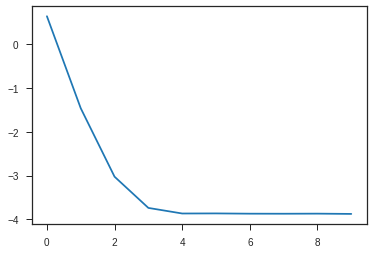

In [18]:
plt.plot(alg.dvals)
plt.show()

In [19]:
loc, S = alg.loc.base, alg.S.base

loc0 = mlocation_scatter.standard_location(XX)
S0 = mlocation_scatter.standard_covariance(XX, loc0)

distfunc = distance.MahalanobisDistance(np.linalg.inv(S))
distfunc0 = distance.MahalanobisDistance(np.linalg.inv(S0))

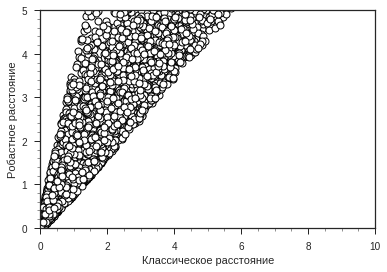

In [20]:
D0 = [distfunc0(x, loc0) for x in XX]
D = [distfunc(x, loc) for x in XX]
plt.scatter(D0, D, c='w', edgecolor='k', linewidth=1)
plt.xlabel('Классическое расстояние')
plt.ylabel('Робастное расстояние')
plt.minorticks_on()
plt.xlim(0,10)
plt.ylim(0,5)
# plt.title('Многомерное нормальное (m=%s) с выбросами %s%%' % (m, q))
# plt.savefig('fig/robust_clustering_dran_multinormal_distance_%s_%s.eps' % (m, q))
plt.show()

In [21]:
avg4 = averager_it(func.QuantileFunc(0.5, func.Sqrt(0.001)))
avg4 = avragg.MWAverage(avg4)

alg2 = mlocation_scatter.MLocationsScattersEstimator(avg4, 3)
alg2.fit(XX)

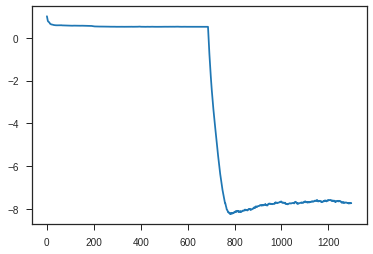

In [22]:
plt.plot(alg2.dvals)
plt.show()

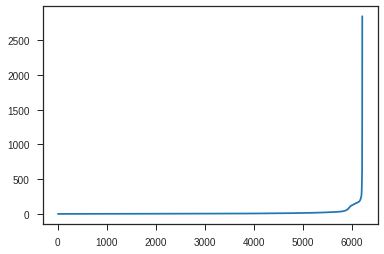

In [23]:
D = alg2.calc_distances()
plt.plot(sorted(D))
# plt.ylim(0,200)
plt.show()

In [24]:
for S in alg2.scatters:
    print(np.linalg.inv(S))

[[ 2.93380415e+00 -8.42025032e+00  6.73687124e+01]
 [-8.42025032e+00  3.72077948e+01 -2.88229076e+02]
 [ 6.73687124e+01 -2.88229076e+02  4.48936356e+03]]
[[ 4.31345970e+00  3.00056346e-01 -3.03306096e+00]
 [ 3.00056346e-01  2.81649310e+00  3.67495224e+01]
 [-3.03306096e+00  3.67495224e+01  3.93977724e+03]]
[[   7.4013308   -11.2713606    77.80312112]
 [ -11.2713606    60.9037269  -153.44608994]
 [  77.80312112 -153.44608994 3763.29451626]]
